In [12]:
import pandas as pd
from matplotlib import pyplot as plt

In [13]:
data = pd.read_csv('Data/ARSS-90-seq+stru.csv', header=None, names=['sequence', 'label', 'structure'])
data.head()

,sequence,label,structure
0,MAEPVLSVKDLDIRFTTPDGNVHAVKKVSFDIAPGECLGVVGESGS...,0,CCCCEEEEEEEEEEEECCCCEEEEEEEEEEEECCCEEEEEEEECCC...
1,MADYLLEMKNIVKEFGGVRALNGIDIKLKAGECAGLCGENGAGKST...,0,CCCEEEEEEEEEEECCCEEEECCCCEEEECCEEEEEEECCCCCHHH...
2,MKNDRGEMVPFSAFMTIKKKQGANEINRYNMYNTAAIRGGPATGYS...,0,CECCCCCEEEHHHHEEEEECCCCCEEEEECCECEEEEEEEECCCCC...
3,MGNLPRPTLSPSLSGIRPTMNRETTTRVDSSTPAARLGMRVPSTSR...,0,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCHHHHCCCCCCCHHH...
4,MRQAVMQGVGDAFKKLVRFNEISEKFAEPMSDDEMNALLEEQAKLQ...,0,CHHHHHHHHCHHHHHHHHHHHHHHHHHCCCCHHHHHHHHHHHHHHH...


### Class Distribution

In [14]:
print(f"Total genes: {len(data)}")
print(f"Resistant gene count: {data['label'].sum()}")
print(f"Susceptible gene count: {len(data) - data['label'].sum()}")

Total genes: 5752
Resistant gene count: 2260
Susceptible gene count: 3492


### Amino acid encoding example
In order for a model to interpret letters, they must be encoded into numbers, and we can do this using a simple map where we assign a number to each amino acid symbol.

In [15]:
from preprocessing import aa_encode

In [16]:
# Maps amino acids to integers, was taken from dataset publication
aa_code = {'A': 1, 'R': 2, 'N': 3, 'D': 4, 'C': 5, 'Q': 6, 'E': 7, 'G': 8, 
               'H': 9, 'I': 10, 'L': 11, 'K': 12, 'M': 13, 'F': 14, 'P': 15, 
               'O': 16, 'S': 17, 'U': 18, 'T': 19, 'W': 20, 'Y': 21, 'V': 22, 
               'X': 23}

In [17]:
sequence = 'MAEPVLS'

new_sequence = aa_encode(sequence, aa_code)

print(new_sequence)

[13, 1, 7, 15, 22, 11, 17]


In [18]:
encoded_sequences = []

for sequence in data['sequence']:
    seq = aa_encode(sequence, aa_code)
    encoded_sequences.append(seq)

data['encoded'] = encoded_sequences

### Plotting amino acid distribution
Susceptible: 0
<br>
Resistant: 1

In [19]:
from visuals import plot_aa_distribution_by_group

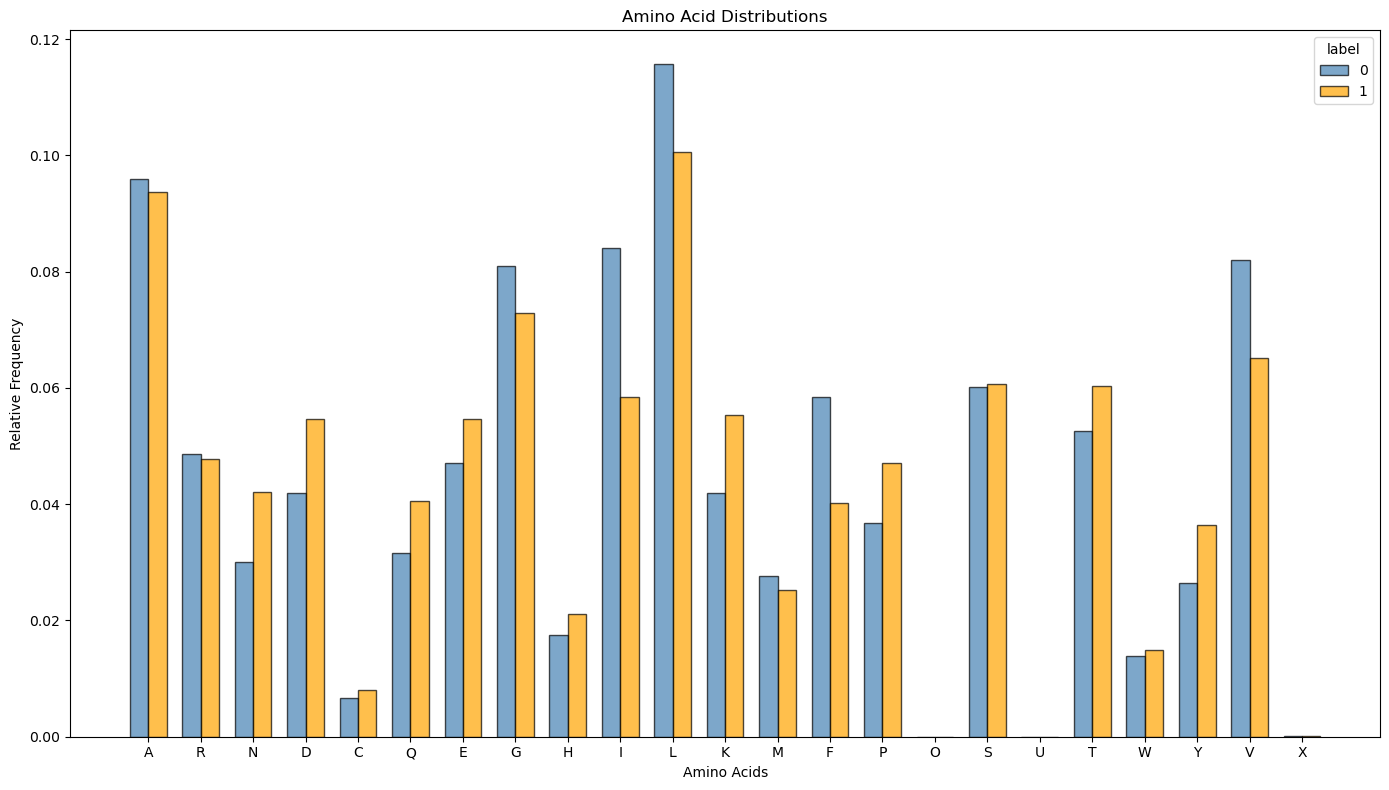

In [20]:
plot_aa_distribution_by_group(data=data,
                              column_name='encoded',
                              group_column='label',
                              plot_title='Amino Acid Distributions')

### Dataset Noise
Unfortunately there is some weird noise in the data in the form of symbols <b>O</b>, <b>U</b>, and <b>X</b>. The map used to encode the amino acid sequences in the orignial publication is the same map used in my `aa_encode` function. This leads to some confusion as there are only 20 amino acids, however there are 23 symbols encoded, as seen above. The original publication of this dataset does not explain these discrepencies, but the most likely explanation is that each of these accounts for a specific type of uncertainty where the exact amino acid is unknown. Because these three symbols are so uncommon in the dataset, I will be removing them from further analysis in order to prevent the model learning from essentially noise.

### Splitting and Saving
In most machine learning experiments, the use of train, validation, and test datasets are essential. This is achieved by splitting the original dataset into 3 seperate sets with a common split being 70/15/15 for train, validation, and test respectively. This is the same split used for this experiment. I am splitting and saving the data before training any models to ensure that each experiment is being tested on the same dataset splits, meaning that each model will be trained on the same train dataset and evaluated on the same validation and test datasets. This is necessary in order to accurately compare models.

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
data = pd.read_csv('Data/ARSS-90-seq+stru.csv', header=None, names=['sequence', 'label', 'structure'])

# Splitting into train, val, and test sets
train_df, temp_df = train_test_split(data, test_size=0.3, stratify=data['label'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['label'], random_state=42)

# Reset indices
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

# Save datasets
train_df.to_csv('Data/train_data.csv', index=False)
val_df.to_csv('Data/val_data.csv', index=False)
test_df.to_csv('Data/test_data.csv', index=False)